In [2]:
import pandas as pd
import matplotlib.pyplot as plt

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Guam' : 'GM'
}

ventilatorsPerState = pd.read_csv('ventilators.csv', index_col=0)
bedsPerState = pd.read_csv('hospitals_beds.csv', index_col=0).groupby(['State']).sum().reset_index()

ventilatorsPerState['State'] = ventilatorsPerState['State'].apply(lambda x: us_state_abbrev[x])

hospitalResources = ventilatorsPerState.join(bedsPerState.set_index('State'), on='State')

hospitalResources['Ventilators/Bed'] = hospitalResources.apply(lambda x: x['Ventilators']/x['Beds'], axis=1)

ax = hospitalResources.plot.scatter(x='Beds', y='Ventilators', alpha=0.5, figsize=(20,10))
for i, txt in enumerate(hospitalResources.State):
    ax.annotate(txt, (hospitalResources.Beds.iat[i],hospitalResources.Ventilators.iat[i]))
plt.show()

<Figure size 2000x1000 with 1 Axes>

In [3]:
hospitalProfiles = pd.read_csv('hospitals_beds.csv', index_col=0)

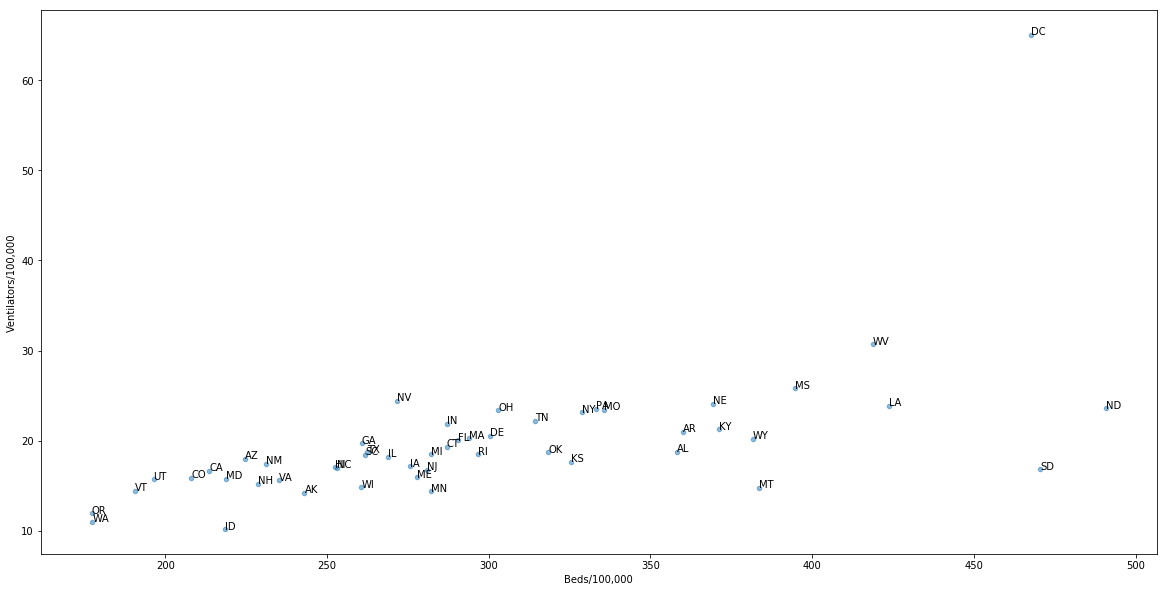

In [4]:
import requests

URL = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population'

r = requests.get(URL)

stateStats = pd.read_html(r.content, header=[0])[0]
stateStats.columns = ['Drop0', 'Drop1', 'State', 'Population', 'Drop2', 'Drop3', 'Drop4', 'Drop5', 'Drop6', 'Drop7', 'Drop8', 'Drop9']
stateStats = stateStats[['State', 'Population']].iloc[1:53]
stateStats['State'] = stateStats['State'].apply(lambda x: us_state_abbrev[x])
stateStats['Population'] = stateStats['Population'].apply(lambda x: int(x))

perCapitaResources = hospitalResources.join(stateStats.set_index('State'), on='State')
perCapitaResources['Beds/100,000'] = perCapitaResources.apply(lambda x: x['Beds']/x['Population'], axis = 1) * 100000
perCapitaResources['Ventilators/100,000'] = perCapitaResources.apply(lambda x: x['Ventilators']/x['Population'], axis = 1) * 100000

perCapitaResources

ax = perCapitaResources.plot.scatter(x='Beds/100,000', y='Ventilators/100,000', alpha=0.5, figsize=(20,10))
for i, txt in enumerate(perCapitaResources.State):
    ax.annotate(txt, (perCapitaResources['Beds/100,000'].iat[i],perCapitaResources['Ventilators/100,000'].iat[i]))
plt.show()

In [5]:
def calcVentilators(row):
    beds = float(row['Beds'])
    state = row['State']
    ventilators = 0.0
    try:
        vpb = float(perCapitaResources[perCapitaResources['State'].str.contains(state)]['Ventilators/Bed'])
        ventilators = beds * vpb
    except:
        return ventilators        
    return ventilators

def vpbLookup(row):
    state = row['State']
    vpb = 0.0
    try:
        vpb = float(perCapitaResources[perCapitaResources['State'].str.contains(state)]['Ventilators/Bed'])
    except:
        return vpb
    return vpb

    
hospitalProfiles['Estimated Ventilators'] = hospitalProfiles.apply(calcVentilators, axis=1)
hospitalProfiles['Statewide Ventilators per Bed'] = hospitalProfiles.apply(vpbLookup, axis=1)
hospitalProfiles.to_csv('hospital_profiles.csv')

In [6]:
hospitalProfiles

,Hospital Name,Beds,City,State,Estimated Ventilators,Statewide Ventilators per Bed
0,Northside Behavioral Health Center,0,Tampa,FL,0.000000,0.069046
1,Adventist Health Saint Helena Center for Behav...,61,Vallejo,CA,4.760613,0.078043
2,Adventist Health Simi Valley,144,Simi Valley,CA,11.238167,0.078043
3,Adventist Ukiah Valley,50,Ukiah,CA,3.902141,0.078043
4,Ascension Columbia Saint Mary's Hospital Ozaukee,120,Mequon,WI,6.831840,0.056932
5,Ascension Columbia Saint Mary's Women's Hospital,0,Milwaukee,WI,0.000000,0.056932
6,Ascension Our Lady of Victory Hospital,24,Stanley,WI,1.366368,0.056932
7,Ascension Saint John Hospital,612,Detroit,MI,40.115125,0.065548
8,Ascension Saint Michael's Hospital,84,Stevens Point,WI,4.782288,0.056932
9,Avera Dakota Plains Surgery Center,15,Aberdeen,SD,0.537001,0.035800


In [109]:
df = pd.read_csv('hospitals_beds.csv', index_col=0)

df[df['State'].str.contains('OR')][df['City'].str.contains('Medford')]

df['City, State'] = df['City'] + ', ' + df['State']
df['City, State'].unique().shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(4129,)